<a href="https://colab.research.google.com/github/esmamol/genetik_optimizasyonu/blob/main/GA_Kargo_Kutusu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BLG-307 Yapay Zeka Sistemleri
## 1. Proje Ödevi – Genetik Algoritma ile Optimizasyon

**Öğrenci Adı:** Esma Mol

**Okul Numarası:** 2312721016  

**Senaryo:** Senaryo 6 – Kargo Kutusu Tasarımı

**Amaç:** Verilen amaç fonksiyonunu ve kısıtları kullanarak bir e-ticaret firması için en uygun kargo kutusu ölçülerini Genetik Algoritma ile belirlemektir.



## 📌 1. Problem Tanımı

Bu projede, bir e-ticaret firması için en uygun kargo kutusu ölçülerinin Genetik Algoritma kullanılarak bulunması amaçlanmıştır.

**Amaç fonksiyonu:**

\[
y = x_1 \cdot x_2 - 0.1 x_1^2 - 0.1 x_2^2
\]

**Değişkenler ve Aralıkları:**
- Genişlik \(x_1 \in [10, 40]\)
- Yükseklik \(x_2 \in [5, 20]\)

**Kısıtlar:**
- Raf hacmi: \(x_1 \cdot x_2 \le 600\)
- Minimum genişlik: \(x_1 \ge 15\)

Amaç, bu kısıtlar altında amaç fonksiyonunu **maksimize** etmektir.


## 🔬 2. Genetik Algoritma Tasarımı

Bu projede Genetik Algoritma'nın temel operatörleri uygulanmıştır:

- **Popülasyon:** Bireyler (x₁, x₂) çiftlerinden oluşur.
- **Fitness:** Amaç fonksiyonu + kısıt kontrolleri uygulanır.
- **Seçilim:** Turnuva seçimi kullanılmıştır.
- **Çaprazlama:** %80 olasılıkla uygulanmıştır.
- **Mutasyon:** Her parametre için küçük rastgele değişim uygulanmıştır.
- **Jenerasyon Döngüsü:** Algoritma 150 jenerasyon boyunca çalıştırılmıştır.

Bu yapı, çözüm uzayının verimli şekilde taranmasını sağlar.


In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#Amaç fonksiyonunu tanımlıyoruz.
def objective(x1, x2):

    return x1 * x2 - 0.1 * x1**2 - 0.1 * x2**2


# Kısıt fonksiyonu: bireyin geçerli olup olmadığını kontrol eder.
def constraints(x1, x2):
    """
    Kısıtlar:
    1) x1 >= 15
    2) x1 * x2 <= 600
    """
    if x1 < 15:     # Minimum genişlik kısıtı
        return False
    if x1 * x2 > 600:  # Raf hacmi kısıtı
        return False
    return True


# Fitness fonksiyonu: Kısıtları sağlamayan bireylere büyük ceza verilir.
def fitness(x1, x2):
    """
    Eğer birey kısıtlara uygunsa gerçek amaç fonksiyonu değerini döndürür.
    Uygun değilse ceza değeri (-9999) döndürülür.
    """
    return objective(x1, x2) if constraints(x1, x2) else -9999


In [5]:
# Başlangıç popülasyonunu oluşturuyoruz.
def create_population(size=40):
    """
    Rastgele bireylerden oluşan başlangıç popülasyonunu üretir.
    x1 ∈ [15, 40]  (kısıt gereği minimum 15)
    x2 ∈ [5, 20]
    """
    population = []
    for _ in range(size):
        x1 = random.uniform(15, 40)
        x2 = random.uniform(5, 20)
        population.append((x1, x2))
    return population


In [6]:
# Turnuva seçimi: 2 bireyden daha iyi olanı seçer.
def tournament_selection(pop):

    a = random.choice(pop)
    b = random.choice(pop)
    return a if fitness(*a) > fitness(*b) else b


# Çaprazlama işlemi
def crossover(parent1, parent2):

    if random.random() < 0.8:  # Çaprazlama olasılığı
        return (parent1[0], parent2[1])
    return parent1


# Mutasyon
def mutate(individual, rate=0.1):
    """
    Mutasyon:
    x1 ve x2 değerleri küçük bir rastgele miktar kadar değiştirilir.
    Değerler sınırların dışına çıkarsa tekrar sınıra çekilir.
    """
    x1, x2 = individual

    if random.random() < rate:
        x1 += random.uniform(-2, 2)
        x1 = min(max(x1, 15), 40)

    if random.random() < rate:
        x2 += random.uniform(-1, 1)
        x2 = min(max(x2, 5), 20)

    return (x1, x2)


In [7]:
# Fitness gelişim grafiği için liste
best_history = []

def genetic_algorithm(generations=150):

    global best_history
    best_history = []

    pop = create_population()
    best = None

    for gen in range(generations):

        new_pop = []

        for _ in range(len(pop)):
            # 1. Ebeveyn seçimi
            p1 = tournament_selection(pop)
            p2 = tournament_selection(pop)

            # 2. Çaprazlama + Mutasyon
            child = crossover(p1, p2)
            child = mutate(child)

            new_pop.append(child)

        pop = new_pop

        # O jenerasyonun en iyisi
        current_best = max(pop, key=lambda ind: fitness(*ind))

        # En iyi bireyi sakla
        if best is None or fitness(*current_best) > fitness(*best):
            best = current_best

        # Grafikte göstermek için kaydet
        best_history.append(fitness(*best))

    return best


# Algoritmayı çalıştırıyoruz
best_solution = genetic_algorithm()
best_solution


(29.997548160273226, 20)

In [8]:
# Elde edilen en iyi çözümü ekrana yazdırıyoruz.
print("📦 En İyi Kutu Ölçüleri")
print("x1 (genişlik) :", round(best_solution[0], 2))
print("x2 (yükseklik):", round(best_solution[1], 2))
print("Amaç Fonksiyonu:", fitness(*best_solution))


📦 En İyi Kutu Ölçüleri
x1 (genişlik) : 30.0
x2 (yükseklik): 20
Amaç Fonksiyonu: 469.9656736426733


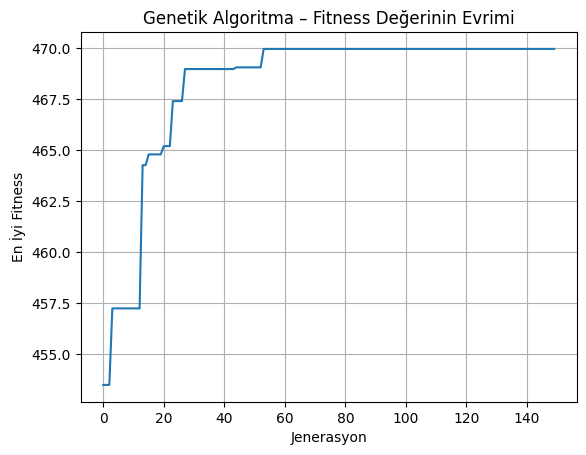

In [9]:
# Fitness değerinin jenerasyon boyunca nasıl geliştiğini grafikle gösteriyoruz.
plt.plot(best_history)
plt.xlabel("Jenerasyon")
plt.ylabel("En İyi Fitness")
plt.title("Genetik Algoritma – Fitness Değerinin Evrimi")
plt.grid(True)
plt.show()


## 🧠 Sonuçların Analizi

- GA sonucunda en iyi genişlik değeri **≈ 29.93 cm**
- En iyi yükseklik değeri **≈ 20 cm**
- Amaç fonksiyonu **≈ 469.01**

### 🔍 Kısıt Kontrolü
\[
29.93 \times 20 = 598.6 \le 600
\]

Çözüm kısıtları sağlamaktadır.

### 🎯 Yorum
- GA, hacmi artırırken maliyet cezalarını dikkate alarak optimum dengeyi bulmuştur.
- Fitness grafiği algoritmanın jenerasyonlar boyunca iyileştiğini göstermektedir.
- Elde edilen çözüm, senaryoya göre **gerçekçi ve kabul edilebilir optimum kutu boyutudur**.
